## $\text{Code Documentation}$

##  $\underline{\text{ 1) Data Stream Simulation Part}}$


$\textbf{a. generate_data_stream(int: pattern_length) function:}$

This function generates a synthetic time-series data stream with a sinusoidal pattern.
It takes an argument pattern_length, which specifies the length of the pattern or the number of data points in the generated stream.
The function checks if pattern_length is a positive integer. If not, it raises a ValueError.
The generated sinusoidal pattern is defined by amplitude (A), center value (center), phase angle (phi), and period (T).
The function returns the generated data stream.
$\newline$
$\textbf{b. add_anomalies_to_data(list: data_stream) function:}$
$\newline$
This function introduces anomalies into an existing data stream by setting values at specific indices to anomalous values.
It takes a data_stream as an argument, which should be a list or NumPy array.
The function checks if data_stream is a valid type (list or NumPy array). If not, it raises a TypeError.
Anomalies are introduced by setting values at specific indices to predefined anomalous values.
In this example, anomalies are introduced at indices 100, 123, 345, 456, 460, 622, 700.




## $\underline{\text{2) Anomaly Detection Part}}$

This code defines a Python class named RCTreeForest that implements an anomaly detection algorithm using the Random Cut Tree (RCT) forest. Below is an explanation of the key components of the code:

$\textbf{a. RCTreeForest Class Initialization: int: num_trees, int: tree_size, and int: window_size}$

The class is initialized with $\underline{\text{three parameters: num_trees, tree_size, and window_size}}$. These parameters define the characteristics of the RCT forest.
It checks if the input parameters are positive integers. If not, it raises a ValueError.
It initializes the number of trees (num_trees), the size of each tree (tree_size), and the shingle size (window_size) for processing the data stream.
It creates a list of RCTree instances, forming the RCT forest.
$\newline$
$\textbf{b. anomaly_detector method:}$

This method is responsible for detecting anomalies in the data stream.
It takes $\underline{\text{two parameters: index and point}}$.
$\newline$
$\quad$index: The index of the current data point in the data stream.
$\newline$
$\quad$point: A list of numeric values representing the current data point or a shingle of data points.
$\newline$
It checks if index is a non-negative integer and if point is a list of numeric values with the correct length. If not, it raises a ValueError.
It initializes avg_codisplacement to zero, which will be used to accumulate the codisplacement values from each tree in the forest.
It iterates through each tree in the forest and performs the following steps:
If the tree size exceeds the specified limit (tree_size), it removes the oldest point in a First-In-First-Out (FIFO) manner.
It inserts the new data point or shingle (point) into the tree at the specified index.
It computes the codisplacement for the new point using the codisp method of the tree.
It accumulates the codisplacement values across all trees.
It returns the average codisplacement for the given data point.

If the average codisplacement is greater equal 1.7 times the prev we can say this is an anomaly. This factor can be fine tuned. 
$\newline$
$\textbf{c. Error Handling:}$

The code includes error handling to catch potential issues during initialization and anomaly detection. If any of the specified conditions are not met, a ValueError is raised, and an error message is printed.
This class is designed for online anomaly detection in a streaming data scenario, where data points arrive sequentially. The RCT forest is updated with each new data point, and the average codisplacement across the trees is used as an anomaly score. Anomalies can be identified by comparing this score to a threshold.


##  $\underline{3) \text{Visualization Part}}$

Figure Size Configuration:

plt.figure(figsize=(10, 6)): This line creates a new figure for the plot and sets its size. The figsize parameter is a tuple representing the width and height of the figure. In this case, the width is set to 10 units, and the height is set to 6 units.
Plotting the Data Stream:

plt.plot(np.arange(1000), data_stream, label='Data Stream'): This line creates a line plot of the data stream. It uses np.arange(1000) to generate an array of indices from 0 to 999 (assuming the length of data_stream is 1000). The data_stream values are then plotted against these indices. The label parameter is set to 'Data Stream' for the legend.
Plotting Anomaly Scores:

plt.plot(np.arange(1000), anomaly_score, label='Anomaly Score', color='red'): This line creates another line plot for the calculated anomaly scores. Similar to the data stream plot, it uses np.arange(1000) for the x-axis and anomaly_score for the y-axis. The label parameter is set to 'Anomaly Score' for the legend. The color parameter is set to 'red' to visually distinguish it from the data stream plot.
Legend Display:

plt.legend(loc='upper right'): This line adds a legend to the plot. The loc parameter specifies the location of the legend, and in this case, it is set to 'upper right'. The legend helps distinguish between the two lines in the plot by associating labels with each.
Displaying the Plot:

plt.show(): This line displays the plot. After setting up the figure, plotting the data stream and anomaly scores, and adding a legend, plt.show() is called to render the plot on the screen.




## $\text{Algorithm Selection}$:
### $\text{For this Project I've selected Robust-Random-Cut-Forest Algorithm to detect anomalies}$



### $\text{Algorithm Breif Description:}$
Random Cut Forest (RCF) is an unsupervised algorithm for detecting anomalous data points within a data set.These are observations which diverge from otherwise well-structured or patterned data. Anomalies can manifest as unexpected spikes in time series data, breaks in periodicity, or unclassifiable data points.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import rrcf

### $\text{Data Stream Simulation:}$

In [20]:
def generate_data_stream(pattern_length):
    try:
        # Check if pattern_length is a positive integer
        if not isinstance(pattern_length, int) or pattern_length <= 0:
            raise ValueError("Pattern length must be a positive integer.")

        # Set the pattern length
        n = pattern_length
        # Set amplitude
        A = 50
        # Set the center value
        center = 100
        # Set phase angle
        phi = 30
        # Set period
        T = 2 * np.pi / 100
        # Generate time values
        t = np.arange(n)
        # Generate a sinusoidal pattern with specified parameters
        sin = A * np.sin(T * t - phi * T) + center

        return sin

    except ValueError as e:
        print(f"Error in generate_data_stream: {e}")
        
        
def add_anomalies_to_data(data_stream):
    try:
        # Check if data_stream is a list or NumPy array
        if not isinstance(data_stream, (list, np.ndarray)):
            raise TypeError("Data stream must be a list or NumPy array.")

        # Introduce anomalies by setting values at specific indices to 100, 123, 345, 456, 460, 622, 700
        data_stream[100] = 28
        data_stream[123] = 63
        data_stream[345] = 45
        data_stream[456] = 66
        data_stream[460] = 3
        data_stream[622] = 36
        data_stream[700] = 59

    except TypeError as e:
        print(f"Error in add_anomalies_to_data: {e}")


### $\text{Anomaly Detection:}$

In [22]:
import rrcf

class RCTreeForest:
    def __init__(self, num_trees, tree_size, window_size):
        try:
            # Check if input parameters are positive integers
            if not all(isinstance(param, int) and param > 0 for param in [num_trees, tree_size, window_size]):
                raise ValueError("All parameters must be positive integers.")

            # Initialize the Random Cut Tree (RCT) forest with a specified number of trees and tree size
            self.num_trees = num_trees
            self.tree_size = tree_size
            self.shingle_size = window_size

            # Create a list of RCTree instances to form the forest
            self.forest = [rrcf.RCTree() for _ in range(num_trees)]

        except ValueError as e:
            print(f"Error in initialization: {e}")

    def anomaly_detector(self, index, point):
        try:
            # Check if index is a positive integer
            if not isinstance(index, int) or index < 0:
                raise ValueError("Index must be a non-negative integer.")

            # Check if point is a list of numeric values with the correct length
            if not isinstance(point, list) or len(point) != self.shingle_size or not all(isinstance(p, (int, float)) for p in point):
                raise ValueError(f"Point must be a list of {self.shingle_size} numeric values.")

            # Initialize average codisplacement to zero
            avg_codisplacement = 0

            for tree in self.forest:
                # If the tree size exceeds the specified limit, forget the oldest point (FIFO)
                if len(tree.leaves) > self.tree_size:
                    tree.forget_point(index - self.tree_size)

                # Insert the new point into the tree
                tree.insert_point(point, index=index)

                # Compute the codisplacement for the new point
                new_codisplacement = tree.codisp(index)

                # Accumulate the codisplacement across all trees
                avg_codisplacement += new_codisplacement / self.num_trees

            # Return the average codisplacement for the given point
            return avg_codisplacement

        except ValueError as e:
            print(f"Error in anomaly detection: {e}")




### $\text{Data Stream Plotting: }$

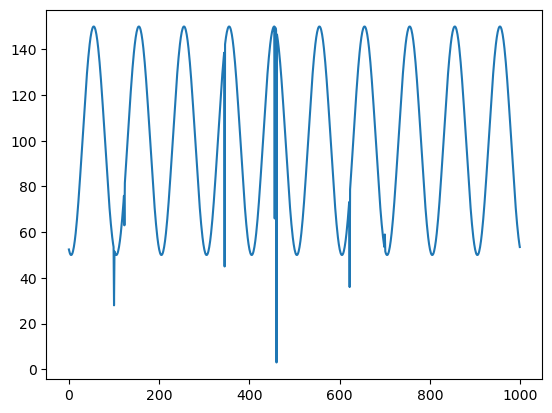

In [23]:
# Generate a data stream with a sinusoidal pattern of length 1000
data_stream = generate_data_stream(1000)

# Introduce anomalies to the generated data stream
add_anomalies_to_data(data_stream)

# Plot the data stream using Matplotlib
plt.plot(np.arange(1000), data_stream)

# Display the plot
plt.show()

### $\text{Anomaly Detector Algorithm:}$

In [25]:
# Define the number of trees in the Random Cut Tree (RCT) forest
num_trees = 40

# Define the size limit for each tree in the RCT forest
tree_size = 256

## Define the size of the window
shingle_size=4

# Create an instance of the RCTreeForest class with the specified number of trees and tree size
forest = RCTreeForest(num_trees, tree_size,shingle_size)


In [26]:
# Initialize empty lists to store anomaly scores and the current data window
anomaly_score = []
current_window = []
prev_idx=0
first=True

# Iterate through the data stream
for i in range(len(data_stream)):
    # If the index is within the shingle size, populate the initial window with data_stream values
    if i < forest.shingle_size:
        current_window.append(data_stream[i])
        # Initialize anomaly score to 0 for the initial window
        anomaly_score.append(0)
        continue
    else:
        # Update the current window by adding the latest data_stream value and removing the oldest
        current_window.append(data_stream[i])
        current_window = current_window[1:]
    
    # Calculate anomaly score using the RCT forest for the current window
    score = forest.anomaly_detector(i, current_window)
    
    # Print the index for tracking progress (optional)
    #print(i, end=' ')
    
    # Append the calculated anomaly score to the list
    anomaly_score.append(score)
    
    #If there is a sudden peak we can say it is a anomaly
    if i>forest.shingle_size+1 and (score>=1.7*anomaly_score[i-1] or score<=-1.7*anomaly_score[i-1] ): 
        print("Anomaly_Detected_at_index: ", i)
        

Anomaly_Detected_at_index:  100
Anomaly_Detected_at_index:  345
Anomaly_Detected_at_index:  456
Anomaly_Detected_at_index:  460
Anomaly_Detected_at_index:  612
Anomaly_Detected_at_index:  622
Anomaly_Detected_at_index:  700


## $\text{Visualization}$

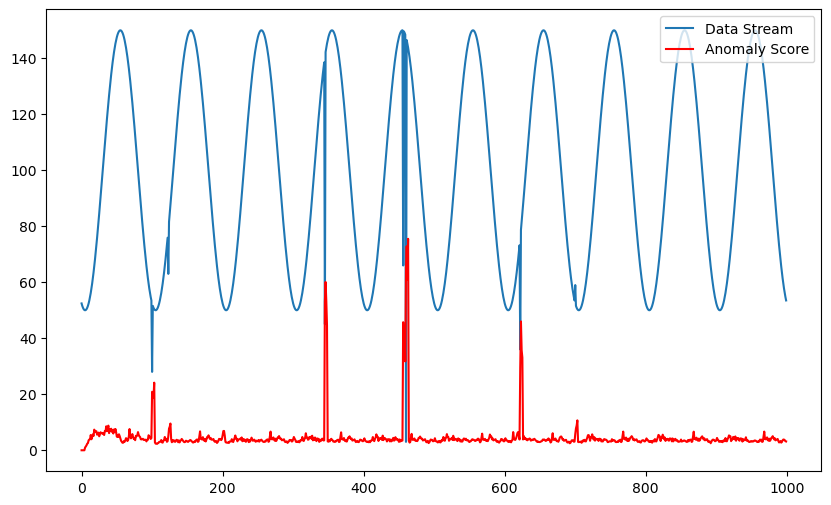

In [27]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed


# Plot the original data stream using Matplotlib
plt.plot(np.arange(1000), data_stream, label='Data Stream')

# Plot the calculated anomaly scores using Matplotlib
plt.plot(np.arange(1000), anomaly_score, label='Anomaly Score', color='red')

# Display the legend to distinguish between the two lines
plt.legend(loc='upper right')


# Display the plot
plt.show()


## $\text{Efficiency}$
$\text{ we can tune the parameter like shingle_size, num_trees,tree_size to improve our accuracy}$
$\text{ For this we can use cross validation technique}$

## $\text{Why Robust-Random-Cut-Forest Algorithm}$
$\textbf{Robustness to Concept Drift:}$

RRCF is designed to be robust in the presence of concept drift, which refers to changes in the underlying data distribution over time. The randomization and ensemble nature of the algorithm enable it to adapt to shifting patterns in the data.
$\newline$
$\textbf{Adaptability to Seasonality}$:

RRCF is capable of capturing patterns and anomalies in time-series data, making it suitable for scenarios with seasonality. The algorithm's ability to construct a forest of trees allows it to adapt to different patterns, including those associated with regular cycles or trends.
$\newline$
$\textbf{Efficient Online Learning:}$

RRCF supports online learning, enabling it to adapt to incoming data in real-time. This is crucial in data stream scenarios where the data is continuously evolving, and traditional batch processing methods might not be suitable.
$\newline$
$\textbf{Variable-Length Windows for Adaptation:}$

RRCF allows for the use of variable-length windows, where the size of the window can be adjusted based on the characteristics of the data. This flexibility is beneficial in scenarios with changing patterns or seasonality, as the algorithm can dynamically adapt to the data window.
$\newline$
$\textbf{Ability to Detect Different Types of Anomalies:}$

RRCF is effective in detecting both point anomalies and contextual anomalies. Point anomalies are isolated abnormal data points, while contextual anomalies are anomalies within a specific context or changing environment. This versatility makes it suitable for scenarios with varying types of anomalies that may arise due to concept drift or seasonality.
Parallelization and Scalability:

RRCF can be efficiently parallelized, allowing for fast processing of data streams. Its scalable nature is advantageous when dealing with large volumes of streaming data, which is often the case in applications with seasonality.
Parameter Tuning Flexibility:

RRCF has parameters that can be tuned to adjust the sensitivity of anomaly detection. This flexibility allows practitioners to fine-tune the algorithm based on the specific characteristics of the data stream, including the degree of concept drift and seasonality.


In [8]:
num_trees = 40
shingle_size = 4
tree_size = 256

forest = []
for _ in range(num_trees):
    tree = rrcf.RCTree()
    forest.append(tree)



def anomaly_detector(index, point):
    
    avg=0;
    for tree in forest:
        # If tree is above permitted size...
        
        if len(tree.leaves) > tree_size:
            # Drop the oldest point (FIFO)
            tree.forget_point(index - tree_size)
        # Insert the new point into the tree
        tree.insert_point(point, index=index)
        # Compute codisp on the new point...
        new_codisplacement = tree.codisp(index)
        # And take the average over all trees
        
        avg += new_codisplacement / num_trees
        
    return avg


In [9]:
anomaly_score=[]
current_window=[]
for i in range(len(data_stream)):
    if i<shingle_size:
        current_window.append(data_stream[i])
        anomaly_score.append(0)
        continue
        
    else:
        current_window.append(data_stream[i])
        current_window=current_window[1:]
        
    score=anomaly_detector(i,current_window)
    print(i,end=' ')
    anomaly_score.append(score)
    

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 27